<a href="https://colab.research.google.com/github/AliNatfji/DictionaryaPP/blob/master/Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('calssification1.csv', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
print(data.head(10) )
print()
print(data.describe())
print()
print(data.shape)

      Exam 1     Exam 2  Admitted
0        NaN        NaN       NaN
1  34.623660  78.024693       0.0
2  30.286711  43.894998       0.0
3  35.847409  72.902198       0.0
4  60.182599  86.308552       1.0
5  79.032736  75.344376       1.0
6  45.083277  56.316372       0.0
7  61.106665  96.511426       1.0
8  75.024746  46.554014       1.0
9  76.098787  87.420570       1.0

           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000

(101, 3)


In [56]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig:  Figure(500x500)
ax:  Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Exam 2 Score')

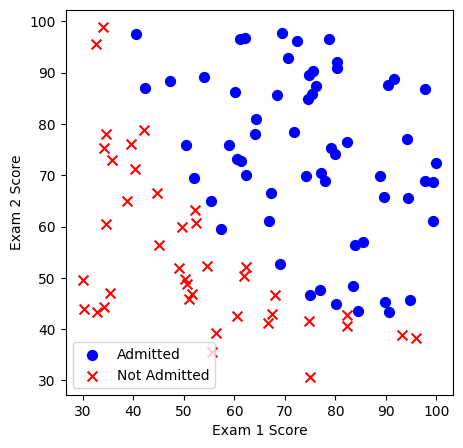

In [57]:
fig, ax = plt.subplots(figsize=(5, 5))
print("fig: ",fig)
print("ax: ",ax)


ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')


ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [59]:
nums = np.arange(-10, 10, step=1)

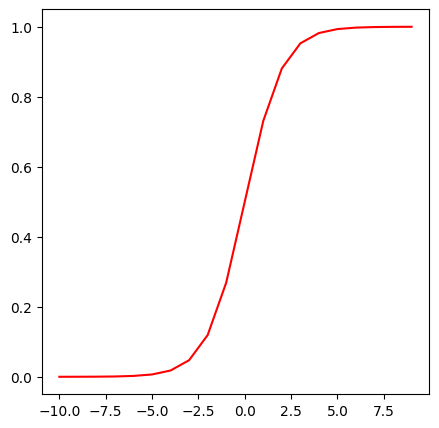

In [60]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), color='red')

In [61]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [62]:
# set X (training data) and y (target variable)
cols = data.shape[1] # number of columns
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [63]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [64]:
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)

X.shape =  (101, 3)
theta.shape =  (3,)
y.shape =  (101, 1)


In [79]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [80]:
thiscost = cost(theta, X, y)
print('cost = ' , thiscost)

cost =  nan


In [67]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad


In [68]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

In [69]:
costafteroptimize = cost(result[0], X, y)
print('cost after optimize = ' , costafteroptimize)

cost after optimize =  nan


In [70]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [71]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 60%
